# Исследование продаж компьютерных игр

Исполнитель - Наталья Яковлева.

<b> Контекст: </b> 

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<b> Задачи исследования: </b>
1. Провести исследовательский анализ исторических данных;
2. Выявить закономерности, которые определяют успешность игры;
3. Дать рекомендации по рекламным кампаниям на следующий период.

<b> Ход исследования: </b>
1. Открыть файл, изучить общую информацию о датасете.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Составить портрет пользователя каждого региона.
5. Проверить гипотезы. 
6. Сделать общий вывод исследования.

<b> Вывод: </b> провела исследование исторических данных по продаже игр. 

Для исследования использовался период с 2014 по 2016 гг., т.к. это целесообразно планированию на 2017 г. Вот какие выводы можно сделать (подробнее они описаны выше, по ходу исследования):

1. Могу выделить платформы, на которых следует сфокусироваться в 2017г. - это PS4 и XOne.
2. Оказалось, что на продажи слабо влияют оценки пользователей и критиков.
3. Самый популярный жанр игр, в который стоит вкладываться - это Action.
4. Составила портреты пользователей для рынков Северной Америки, Европы и Японии. Регионы различаются между собой, поэтому важно это учеть при планировании. Достаточно сильно похожи Северная Америка и Европа, для этих регионов можно придерживаться одной политики. А вот рынок Японии достаточно специфичен (относительно Америки и Европы), поэтому скорее всего для него потребуется другая рекламная кампания.
5. Напоследок были проверены статистические гипотезы.

<b> Портреты пользователей в разных регионах: </b>

<b> Северная Америка: </b> игрок пользуется платформами PS4 или XOne. Чаще всего он покупает игры жанров action, shooter и sports. Скорее всего, это уже взрослый человек от 17 лет.

<b> Европа: </b> игрок пользуется платформой PS4, гораздо реже XOne (почти в 2 раза). Чаще всего он покупает игры жанров action и shooter. Скорее всего, это уже взрослый человек от 17 лет.

<b> Япония: </b> игрок скорее всего пользуется платформой 3DS, гораздо реже PSV или PS4 или PS3. Чаще всего она покупает игры жанров action и role-playing. Скорее всего, это подросток 13+ лет.

In [1]:
# импортирую все необходимые библиотеки для проекта
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

## Общая информация о датасете

In [64]:
path = '' # путь к датасету

In [3]:
data = pd.read_csv(path + 'games.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<b> Вывод:</b> прочитала данные и записала в переменую `data`. В датасете 16715 строк. Бросаются в глаза названия столбцов, которые написаны не  по правилам Python. Есть незначительное количество пропусков в столбцах `name`, `year_of_release`, `genre`. А вот в столбцах `critic_score`, `user_score`, `rating` пропусков уже гораздо больше, нужно будет с ними разобраться. Также будет необходимо скорректировать типы данных, например, `year_of_release` скорее всего должен быть целочисленным. С этими ошибками разберемся на следующем шаге.

## Предобработка данных

### Приведение названий столбцов к нижнему регистру

In [6]:
# для начала приведем названия столбов к нижнему регистру
data.columns = data.columns.str.lower()

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Вывод 2.1: привела названия столбцов к нижнему регистру. Теперь столбцы названы в привычном формате, что не бросается в глаза.

### Преобразование типов данных и обработка пропусков

In [8]:
data.isna().sum() # контрольный замер

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Посмотрим строки, где меньше всего пропусков, т.е. возможно из безболезненно для результатов исследования удалить: столбцы с названием игры, жанром, годом выпуска.

In [9]:
data[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
data[data['genre'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Оказывается, два пропуска в столбцах `name` и `genre` находятся в одних и тех же строках. Строки малоинформативные: оценки критиков 0, нет пользовательских оценок, для строки 14244 - 30 тыс. продаж в Японии. Эти строки можно удалить.

Посмотрим уникальные значения в этиж же столбцах.

In [11]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [12]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Также значения в этих стобцах лучше привести к нижнему регистру.

In [13]:
data['name'] = data['name'].str.lower()
data['genre'] = data['genre'].str.lower()

В столбце `year_of_release` есть 269 пропусков и очевидно, что тип данных дб целым. Если удалить пропуски, то потеряем немного (1.6%). Они могли появится из-за ошибки записи или отсутствия этой инф.

In [14]:
data.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)
data['year_of_release'] = data['year_of_release'].astype('int')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


По итогу обработки столбцов `name`, `genre`, `year_of_release` удалила 271 строку (1.6%). Тип данных столбца `year_of_release` стал целочисленным.

В столбцах `name`, `platform`, `genre`, `rating` должна быть строковая информация. Можно оставить тип данных object.

В столбце `rating` 6766 пропусков. Можно предлоположить, ассоциация появилась не сразу с началом выпусков игр, отсюда пропуски, т.е. рейтинга у игры нет. Также могут быть другие региональные организации, которые занимаются рейтингами игр (например, Японская, Европейская). Также могут быь ошибки при записи. Рассмотрю столбец `rating`, его уникальные значения.

In [16]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Изучила категоризацию рейтинга. Категория К-А устарела, теперь это категория Е, т.е. можно произвести замену К-А на Е. Категория RP используется для игр, у которых еще нет рейтинга, но планируется. Тогда пропуски заполню комментарием 'no_rating'.

In [17]:
data['rating'] = data['rating'].fillna('no_rating')
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
data['rating'].unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [18]:
data['rating'].isna().sum()

0

Избавились от 6766 пропусков в столбце рейтинга. Заодно объединили 2 категории, которые обозначают одно и то же. 

В столбце `critic_score` есть 8578 пропусков, в столбце `user_score` - 6701 пропусков. Посмотрим, какие уникальные значения есть в столбах.

In [19]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Пропуски могли возникнуть по причине ошибки в записи данных или отсутствия оценки вообще (и оценка может появится позже).

У меня была простая идея заменить пропуски 0, но, наверное, это не совсем корректно. Т.к. критик может оценить игру на 0. Оставлю пропуски.

In [20]:
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [21]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди значений встречаются числовые значения, TBD - to be determined (будет определено), значения nan и 0. 

Насколько я знаю, есть алгоритмы оценки пользователей: когда оценка отображается от определенного количества выставленных оценок, видимо отсюда TBD. Также была простая идея: пропуски (tbd отношу сюда же) заменить на 0, но и в этом случае такая замена не совсем корректна. То есть существуют игры, которые были реально оценены пользователями в 0 и таких оценок достаточное количество, чтобы оценка отобразилась. Но также есть пул игр, где оценок пользователей собралось еще недостаточное количество и оценку выставить нельзя.

Тогда в этом случае я изменю тип данных на числовой и некорректные значения принудительно задам как NaN.

In [22]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [23]:
data['user_score'].isna().sum()

8981

In [24]:
data['critic_score'].isna().sum()

8461

В столбце с оценкой пользователя стало больше пропусков: с 6701 до 8981. В столбце с оценкой критиков стало чуть меньше пропусков (подозреваю из-за удаления строк с пропусками в названии, году выпуска, жанре игр). ОСтавлю пока так, будем помнить про эти пропуски.

In [25]:
data.duplicated().sum() # проверка на явные дубликаты

0

Явных дубликатов в данных не нашлось.

In [26]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Вывод 2.2: провела работу с пропусками и типами данных. Удалила 271 строку из 16715. Умышленно оставила пропуски в столбцах `critic_score` и `user_score`, т.к. пропуск обозначает отсутствие оценки.

### Новый столбец с сумой всех продаж

In [28]:
data['all_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [30]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
5,tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating,30.26
6,new super mario bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating,28.31


Вывод 2.3: добавила новый столбец с суммой продаже по всем регионам.

<b> Вывод 2: проведена предобработка данных. Преобразованы названия столбцов по правилам Python. Преобразованы типы данных, обработаны пропуски. Явных дубликатов не обнаружено. Добавлен новый столбец с суммой продаж по всем регионам. </b>

## Исследовательский анализ данных

Для начала посмотрим сколько игр выпускалось в разные годы.

In [31]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

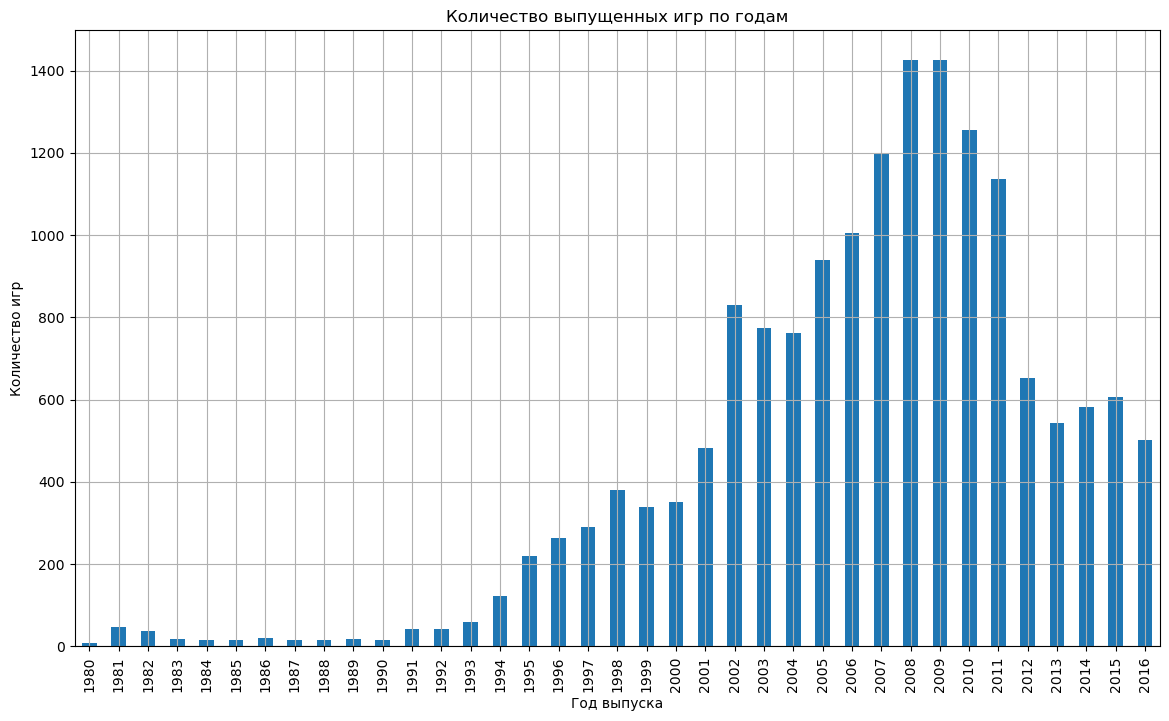

In [32]:
(
    data.groupby('year_of_release')['name'].count()
    .plot(kind='bar', grid=True, figsize=(14, 8), title='Количество выпущенных игр по годам')
)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Могу отметить, что до 2008 года игр с каждым годом выпускалось всё больше. С 2006 по 2011 - самый продуктивный период, игр выпускалось от 1000 до 1500 в год. В 2012 произошел серьезный спад: игр выпустилось почти в 2 раза меньше, чем в 2011. С 2012 по 2016 игр выпускается в диапозоне 500-650 в год.

- Важны ли данные за все периоды? 
- Всё зависит от цели. Наша цель - спрогнозировать, в какие игры стоит вкладываться на 2017 год. Значит, целесообразно исследовать последние годы: 2014, 2015 и неполный 2016.

In [33]:
less_data = data.query("2014 <= year_of_release <= 2016") # выбрала данные за 2014-2016 гг.

Посмотрим, как менялись продажи по платформам по годам.

In [34]:
(
    less_data.groupby('platform')['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales']
    .sum()
    .sort_values(by='all_sales', ascending=False)
)

C:\Users\ol\AppData\Local\Temp\ipykernel_1220\3783760794.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  less_data.groupby('platform')['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales']


,na_sales,eu_sales,jp_sales,other_sales,all_sales
platform,,,,,
PS4,98.61,130.04,15.02,44.48,288.15
XOne,81.27,46.25,0.32,12.52,140.36
3DS,22.64,16.12,44.24,3.68,86.68
PS3,22.05,25.54,11.22,9.37,68.18
X360,28.30,15.49,0.08,4.35,48.22
WiiU,19.36,13.15,7.31,3.16,42.98
PC,7.23,17.97,0.00,1.85,27.05
PSV,2.52,3.53,14.54,1.81,22.40
Wii,2.08,2.59,0.00,0.40,5.07


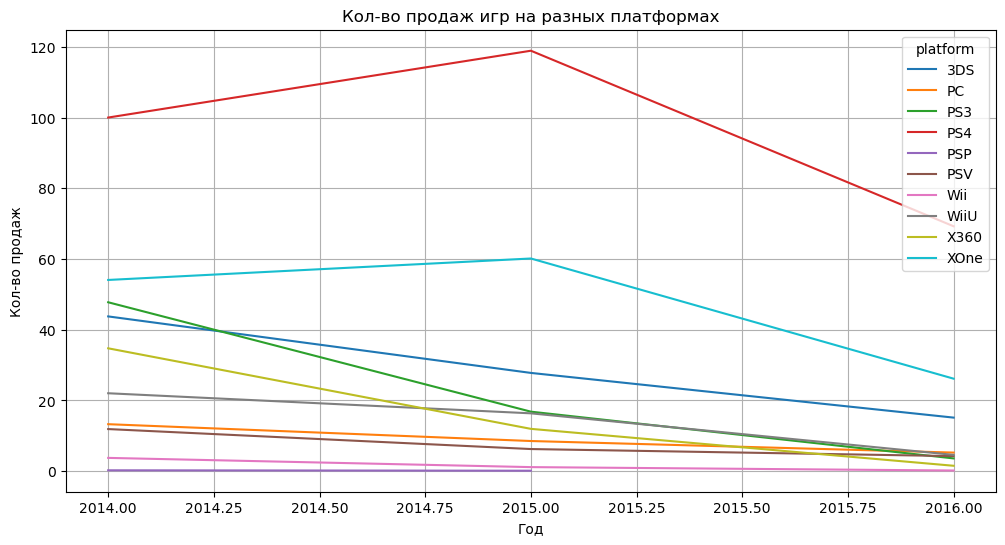

In [35]:
less_data.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').plot(grid=True, figsize=(12, 6), title='Кол-во продаж игр на разных платформах')
plt.xlabel('Год')
plt.ylabel('Кол-во продаж')
plt.show()

Могу отметить, что больше всего игр в этот период продавалось для PS4 и XOne. Эти платформы показывают увеличение продаж в 2015 по сравнению с 2014 и спад к 2016 по сравнению с 2015 (тут важно помнить, что за 2016 данные могут быть неполными). По другим платформам в целом отмечаю спад продаж.

Думаю, можно определить платформы PS4 и XOne как потенциально прибыльные.

Построю график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [36]:
less_data.groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


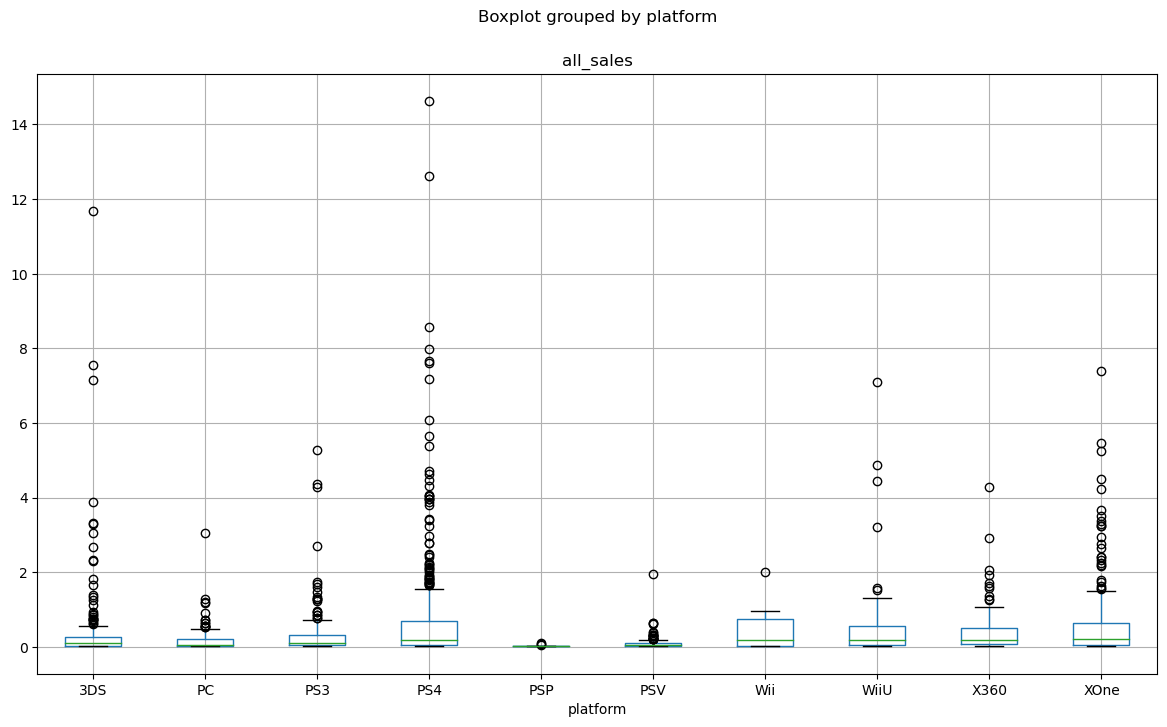

In [37]:
less_data.boxplot(column='all_sales', by='platform', figsize=(14,8))
plt.show()

Среднее продаж среди всех платформ 2014-2016 гг. не превышает 1 млн, максимум среднего у XOne - 615 тыс. 

Медиана продаж не превышает 210 тыс. Максимальная медиана также у XOne - 205 тыс. 

Есть выбросы: где-то частые, что образуют сплошную линию (например, PS4 у 2 млн.), где-то редкие 12 млн., 14 млн. и т.д. Попробуем изменить масштаб, чтобы отсечь ненужные выбросы.

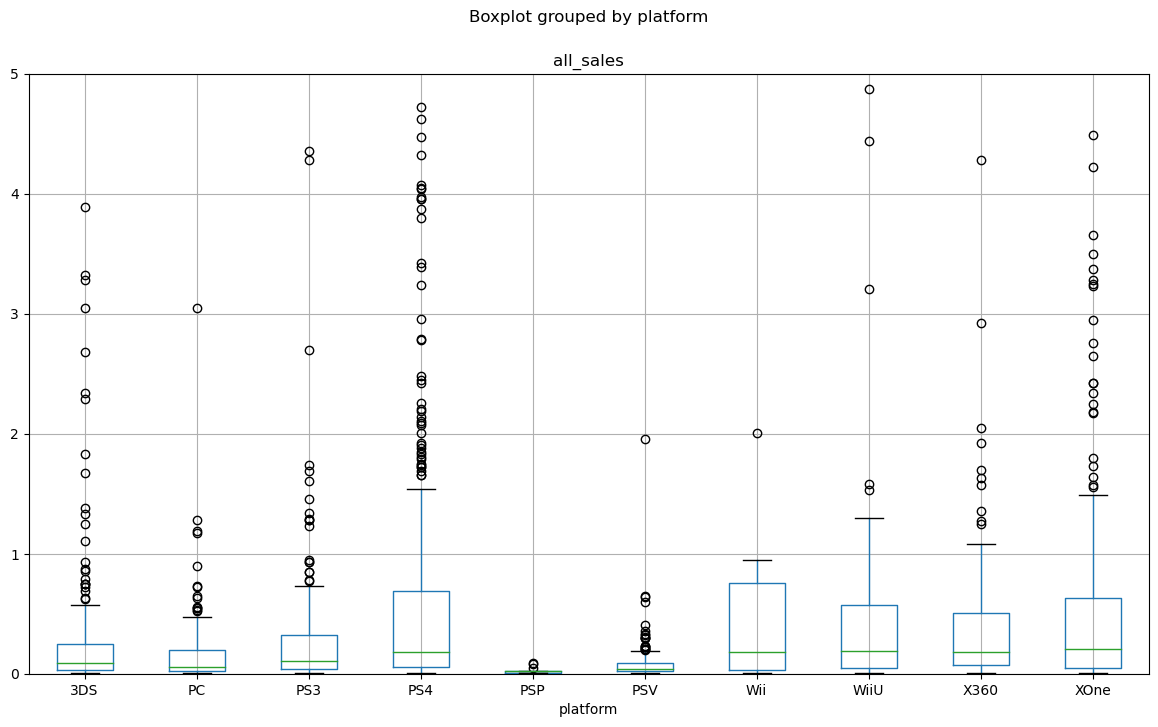

In [38]:
less_data.boxplot(column='all_sales', by='platform', figsize=(14,8))
plt.ylim(0, 5)
plt.show()

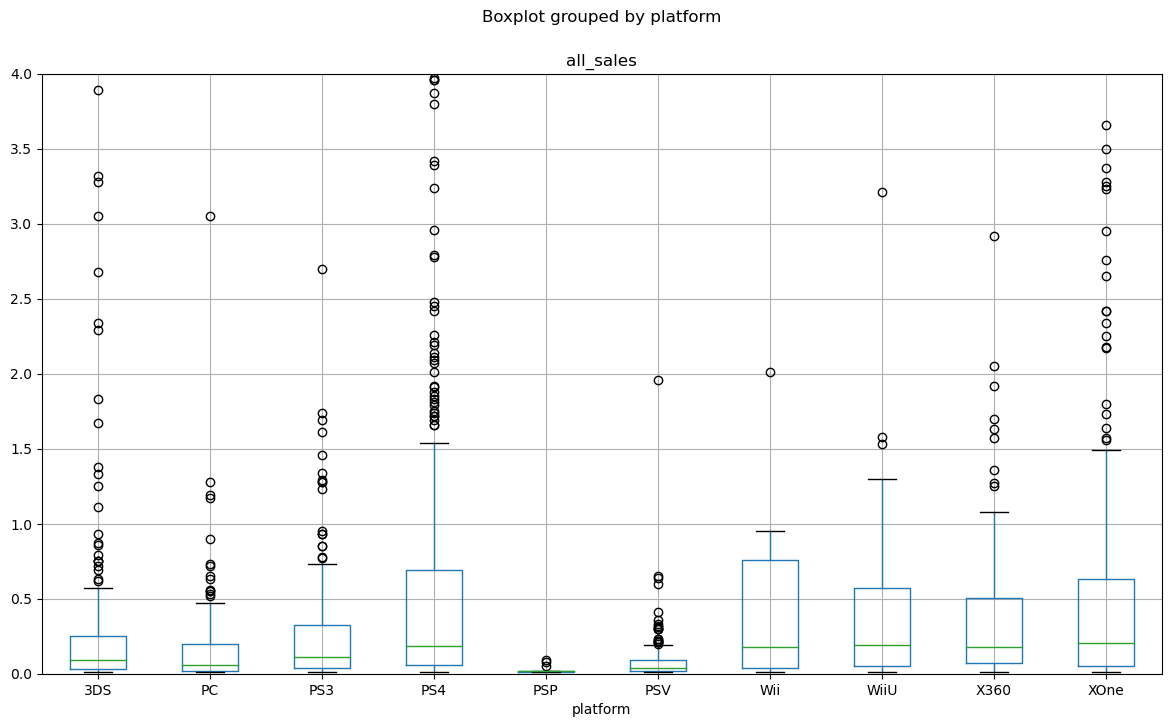

In [39]:
less_data.boxplot(column='all_sales', by='platform', figsize=(14,8))
plt.ylim(0, 4)
plt.show()

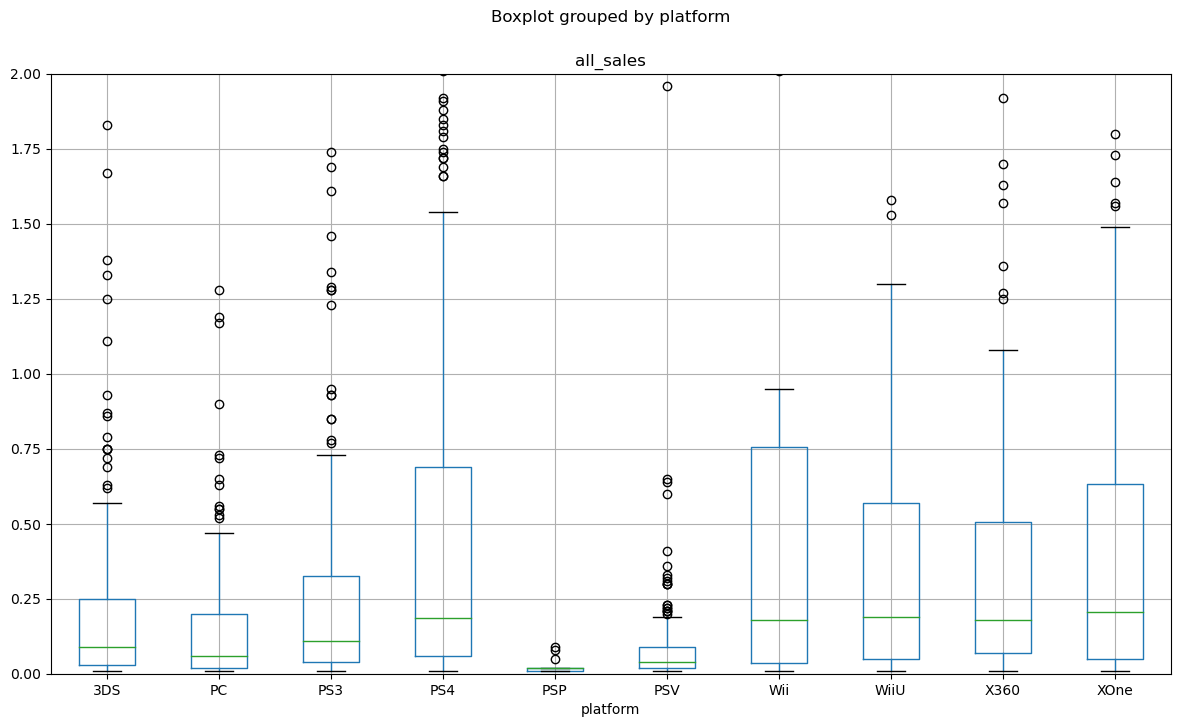

In [40]:
less_data.boxplot(column='all_sales', by='platform', figsize=(14,8))
plt.ylim(0,2)
plt.show()

Всё-таки в дальнешем нас будут интересовать только наиболее популярные платформы (как я определила ранее, это PS4 и XOne). Поэтому оптимально оставить данные до 4-5 млн продаж. Т.к. именно для популярных платформ оставим достаточное количество выбросов, которых много (т.е. они могут влиять на статистику).

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построю диаграмму рассеяния и посчитаю корреляцию между отзывами и продажами. Для анализа возьму PS4.

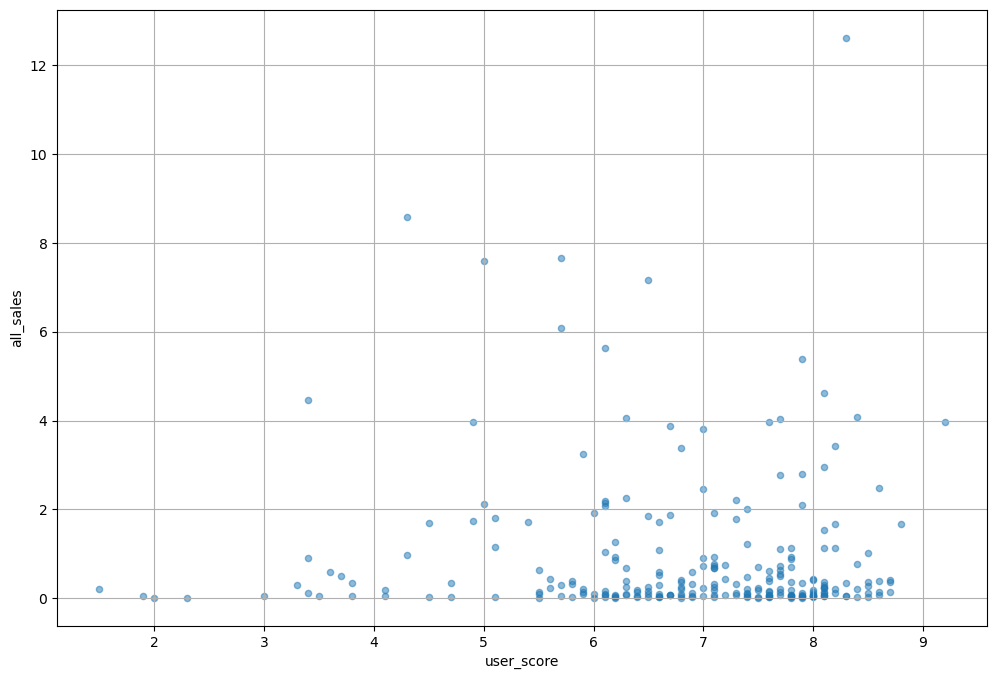

In [41]:
less_data[less_data['platform'] == 'PS4'].plot(x='user_score', y='all_sales', kind='scatter', alpha=0.5, grid=True, figsize=(12, 8))
plt.show()

По графику сильной корреляции между продажами и оценкой пользователей не отмечается, позже проверим коэффициент корреляции.

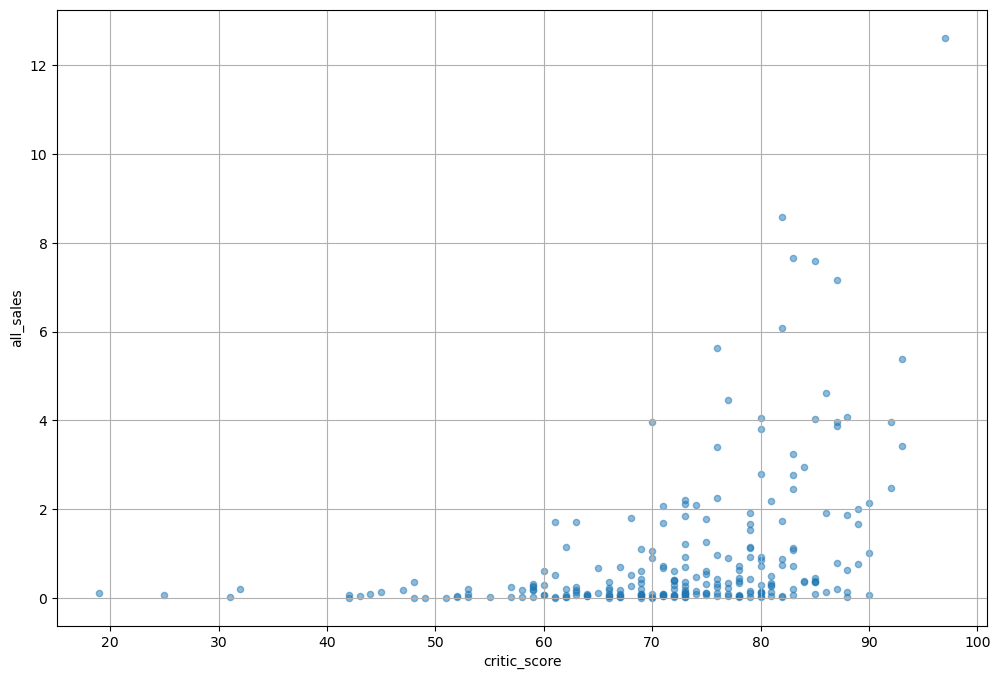

In [42]:
less_data[less_data['platform'] == 'PS4'].plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.5, grid=True, figsize=(12, 8))
plt.show()

Также: поо графику сильной корреляции между продажами и оценкой крииков не отмечается. Проверим значения коэффициента корреляции.

In [43]:
ps4_data = less_data[less_data['platform'] == 'PS4']
ps4_data[['critic_score', 'user_score', 'all_sales']].corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
all_sales,0.402661,-0.040132,1.000000


Построив диаграммы рассеяния и рассчитав коэффициент корреляции, могу сделать вывод, что продажи слабо зависят от оценок пользователей и критиков. Для зависимости продаж от оценки критиков коэф. корреляции слабый положительный (0.4), а для зависимости продаж от оценки критиков - слабый отрицательный (-0.4).

Теперь проверим этот вывод на остальных платформах.

In [44]:
less_data.groupby('platform')[['critic_score', 'user_score', 'all_sales']].corr()

critic_score  user_score  all_sales
platform                                                  
3DS      critic_score      1.000000    0.862485   0.314117
         user_score        0.862485    1.000000   0.215193
         all_sales         0.314117    0.215193   1.000000
PC       critic_score      1.000000    0.466099   0.174634
         user_score        0.466099    1.000000  -0.071597
         all_sales         0.174634   -0.071597   1.000000
PS3      critic_score      1.000000    0.693445   0.446575
         user_score        0.693445    1.000000  -0.166761
         all_sales         0.446575   -0.166761   1.000000
PS4      critic_score      1.000000    0.546434   0.402661
         user_score        0.546434    1.000000  -0.040132
         all_sales         0.402661   -0.040132   1.000000
PSP      critic_score           NaN         NaN        NaN
         user_score             NaN         NaN        NaN
         all_sales              NaN         NaN   1.000000
PSV      critic_score      1.000000    0.524066   0.042665
         user_score        0.524066    1.000000  -0.168455
         all_sales         0.042665   -0.168455   1.000000
Wii      critic_score           NaN         NaN        NaN
         user_score             NaN    1.000000   1.000000
         all_sales              NaN    1.000000   1.000000
WiiU     critic_score      1.000000    0.763536   0.370201
         user_score        0.763536    1.000000   0.407926
         all_sales         0.370201    0.407926   1.000000
X360     critic_score      1.000000    0.625309   0.525723
         user_score        0.625309    1.000000  -0.138445
         all_sales         0.525723   -0.138445   1.000000
XOne     critic_score      1.000000    0.440977   0.428677
         user_score        0.440977    1.000000  -0.070384
         all_sales         0.428677   -0.070384   1.000000

В принипе предыдущий вывод подтверждается: продажи не сильно зависят от оценок критиков и пользователей.

Не учитываем платформы PSP (коэф. корреляции не определен) и Wii (коэф. корр. продаж от оценки пользователей = 1.0, предположу, что это не корректная информация, т.к. платформа перестала поддерживаться в 2013 году, тогда для 2014-2016 - это уже остаточные показатели, и возможно связаны с 1 единственной игрой).

Максимальный показатель коэф. корреляции продаж от оценки критиков = 0.52 для X360. 

Максимальный показатель коэф. корреляции продаж от оценки юзеров = 0.407 для WiiU. Чаще встречаются отрицательные коэффициенты.

Далее посмотрим на общее распределение игр по жанрам.

In [45]:
less_data.groupby('genre')['genre'].count().sort_values(ascending=False)

genre
action          619
role-playing    221
adventure       185
sports          161
shooter         128
misc            113
racing           69
fighting         60
simulation       44
platform         38
strategy         37
puzzle           14
Name: genre, dtype: int64

с 2014 по 2016 больше всего было выпущено игр жанра Action. Далее отрыв серьезный: 619 Action против 221 Role-playing). Посмотрим прибыльность разных жанров.

In [46]:
less_data.groupby('genre')['all_sales'].median().sort_values(ascending=False)

genre
shooter         0.515
sports          0.180
platform        0.140
fighting        0.125
role-playing    0.110
simulation      0.100
action          0.090
misc            0.090
racing          0.090
strategy        0.060
puzzle          0.045
adventure       0.030
Name: all_sales, dtype: float64

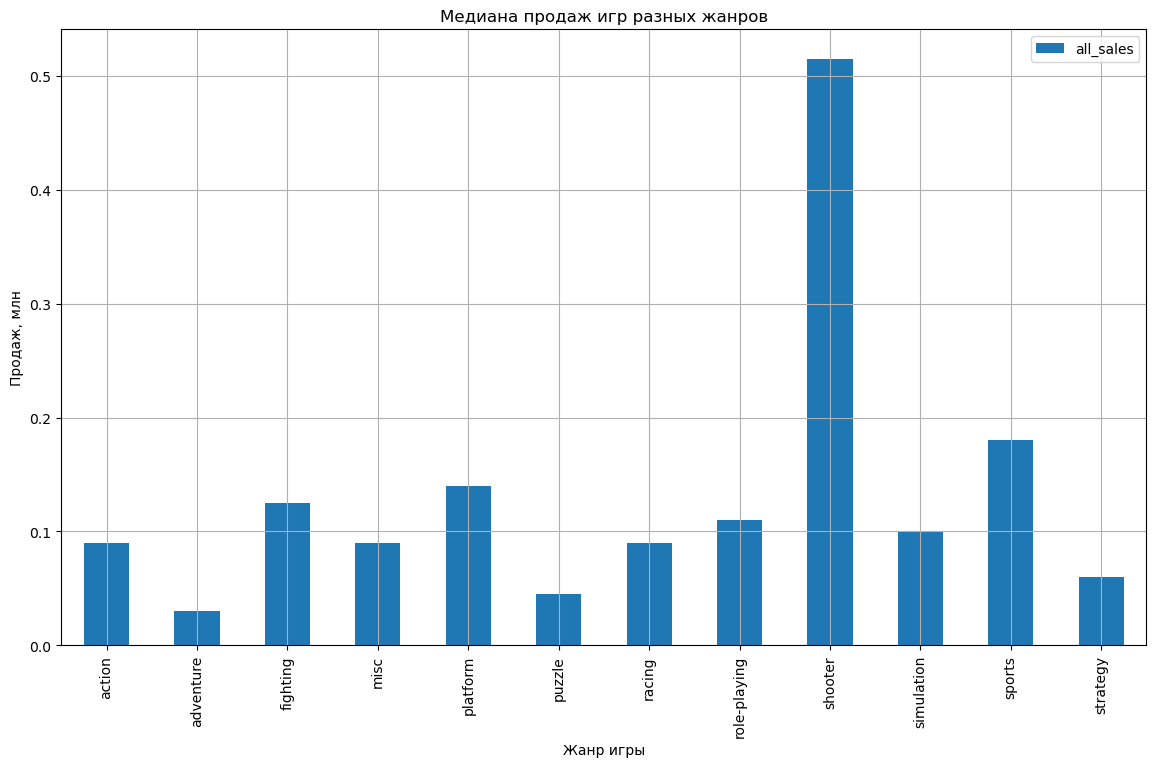

In [47]:
(
    less_data.pivot_table(index='genre', values='all_sales', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(14, 8), title='Медиана продаж игр разных жанров')
)
plt.xlabel('Жанр игры')
plt.ylabel('Продаж, млн')
plt.show()

Получается, самый прибыльный жанр - шутеры. Отрыв от следующего огромный: шутеры 0.5 против спортивных 0.18. Самые неприбыльные - Strategy, Puzzle, Adventure.

<b> Вывод 3. Провела исследовательский анализ данных. Для начала рассмотрела, сколько игр в какие годы выпускалось. Для целей этого исследования был выбран период 2014-2016 гг. Были определены потенциально прибыльные платформы - это PS4 и XOne. Были оценены коэффициенты корреляции между продажами и оценками критиков и пользователей, оказалось, что коэффициенты чаще всего низкие, поэтому корреляция слабая. Также был определен наиболее прибыльный жанр игр - это Shooter. </b>

In [48]:
less_data = less_data.query("all_sales <= 5")

## Портрет пользователя каждого региона

На этом этапе будем исследовать 3 региона - Северная Америка (NA), Европа (EU) и Япония (JP). Для каждого региона требуется определить ТОП-5 платформ, ТОП-5 жанров и влияет ли рейтинг ESRB на продажи в отдельном регионе.

### ТОП-5 платформ для каждого региона

In [49]:
less_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

platform
PS4     73.37
XOne    70.65
X360    28.30
PS3     20.02
WiiU    16.21
3DS     12.04
PC       7.23
PSV      2.52
Wii      2.08
PSP      0.00
Name: na_sales, dtype: float64

In [50]:
less_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

platform
PS4     86.86
XOne    40.40
PS3     23.17
PC      17.97
X360    15.49
WiiU    11.00
3DS      9.81
PSV      3.53
Wii      2.59
PSP      0.00
Name: eu_sales, dtype: float64

In [51]:
less_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

platform
3DS     36.45
PSV     14.54
PS4     13.14
PS3     11.22
WiiU     6.03
PSP      0.36
XOne     0.30
X360     0.08
PC       0.00
Wii      0.00
Name: jp_sales, dtype: float64

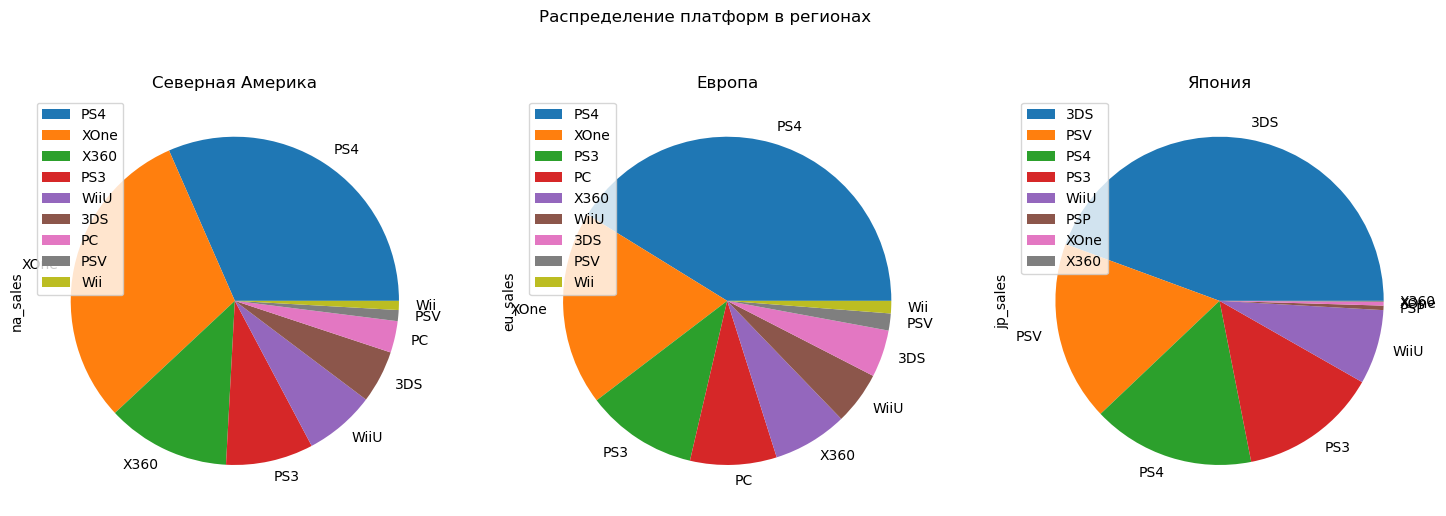

In [52]:
plt.figure(figsize=[18, 6])
plt.suptitle('Распределение платформ в регионах')

plt.subplot(1, 3, 1)
(
    less_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
    .plot(x='platform', y='na_sales', kind='pie', title='Северная Америка')
)
plt.legend(loc='upper left')

plt.subplot(1, 3, 2)
(
    less_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
    .plot(x='platform', y='eu_sales', kind='pie', title='Европа')
)
plt.legend(loc='upper left')

plt.subplot(1, 3, 3)
(
    less_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
    .plot(x='platform', y='jp_sales', kind='pie', title='Япония')
)
plt.legend(loc='upper left')

plt.show()

<b> Для Северной Америки ТОП-5 популярных платформ: </b>
1. PS4
2. XOne
3. X360
4. PS3
5. WiiU 

<b> Для Европы ТОП-5 популярных платформ: </b>
1. PS4
2. XOne
3. PS3
4. PC
5. X360  

<b> Для Японии ТОП-5 популярных платформ: </b>
1. 3DS
2. PSV
3. PS4
4. PS3
5. WiiU  

<b> Вывод 4.1: </b> 

Ранее отмеченные потенциально прибыльные платформы - PS4 и XOne: в топ-5 для Северной Америки и Европы располагаются на 1 и 2 местах, а вот в Японии: в топ-5 попала только PS4. 

Продажи на рынках Свеерной Америки и Европы похожи, тогда как Япония сильно отличается: в топ-5 все эти рынки пересекаются в платформах PS4, PS3. 

При этом ТОП-1 для Японии - это 36.5 млн, а для Европы и Америки - 87 и 73 млн соответственно.

Можем сделать общий вывод, что рынок Японии специфичный относительно Северной Америки и Европы.

### ТОП-5 жанров игр для каждого региона

In [53]:
less_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

genre
action          65.76
shooter         55.04
sports          43.55
role-playing    23.61
misc            13.02
fighting         9.16
platform         6.79
adventure        5.64
racing           5.59
simulation       2.63
strategy         0.98
puzzle           0.65
Name: na_sales, dtype: float64

In [54]:
less_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

genre
action          66.18
shooter         44.46
sports          29.53
role-playing    19.96
racing          11.98
misc            10.49
simulation       7.30
platform         6.80
adventure        6.49
fighting         5.32
strategy         1.79
puzzle           0.52
Name: eu_sales, dtype: float64

In [55]:
less_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

genre
action          29.20
role-playing    25.56
misc             5.61
fighting         3.94
shooter          3.78
adventure        3.60
sports           3.07
platform         2.69
simulation       2.31
strategy         0.95
puzzle           0.93
racing           0.48
Name: jp_sales, dtype: float64

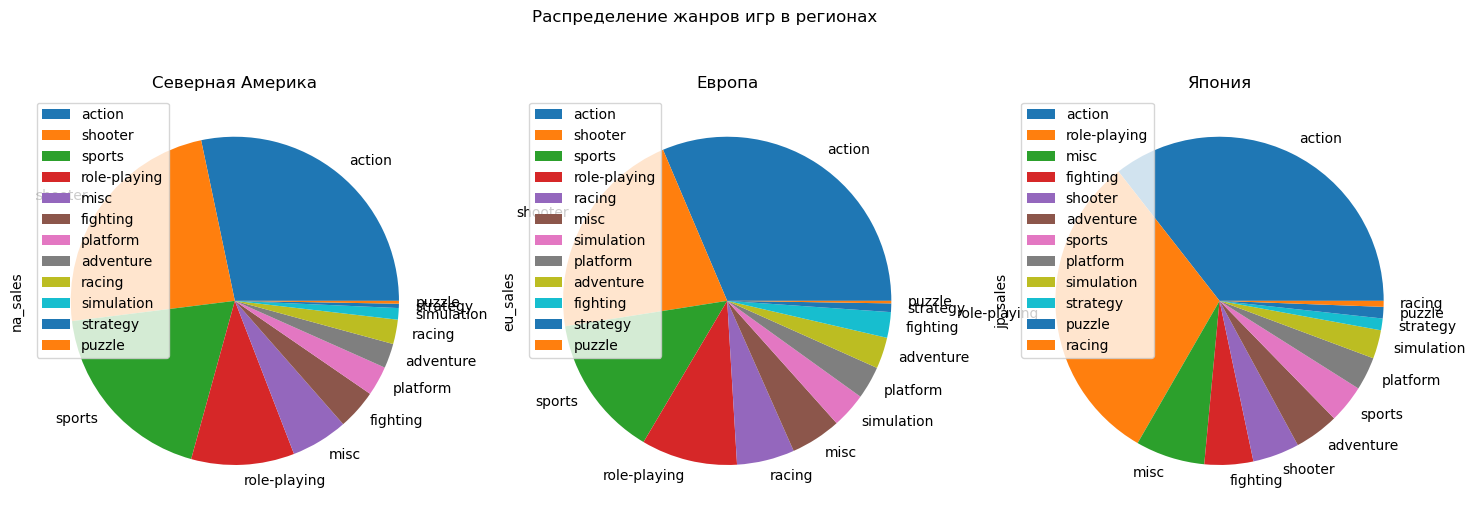

In [56]:
plt.figure(figsize=[18, 6])
plt.suptitle('Распределение жанров игр в регионах')

plt.subplot(1, 3, 1)
(
    less_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
    .plot(x='genre', y='na_sales', kind='pie', title='Северная Америка')
)
plt.legend(loc='upper left')

plt.subplot(1, 3, 2)
(
    less_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
    .plot(x='genre', y='eu_sales', kind='pie', title='Европа')
)
plt.legend(loc='upper left')

plt.subplot(1, 3, 3)
(
    less_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
    .plot(x='genre', y='jp_sales', kind='pie', title='Япония')
)
plt.legend(loc='upper left')

plt.show()

<b> Для Северной Америки ТОП-5 популярных жанров: </b>
1. action
2. shooter
3. sports
4. role-playing
5. misc

<b> Для Европы ТОП-5 популярных жанров: </b>
1. action
2. shooter
3. sports
4. role-playing
5. racing

<b> Для Японии ТОП-5 популярных жанров: </b>
1. action
2. role-playing
3. misc
4. fighting
5. shooter

<b> Вывод 4.2: </b> 

Самый популярный жанр на всех рынках - Action. (как и определила ранее в шаге 3)

Рынки Европы и Северной Америки сходятся на 100% в ТОП-4 (различаются только 5-е места).

Все три рынка пересекаются в жанрах Action, Role-playing и Shooter.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [57]:
less_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
M            81.09
E            45.01
no_rating    38.48
T            34.61
E10+         33.23
Name: na_sales, dtype: float64

In [58]:
less_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
M            76.64
E            39.71
no_rating    38.81
T            29.50
E10+         26.16
Name: eu_sales, dtype: float64

In [59]:
less_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
no_rating    48.52
T            14.43
E             7.47
M             7.24
E10+          4.46
Name: jp_sales, dtype: float64

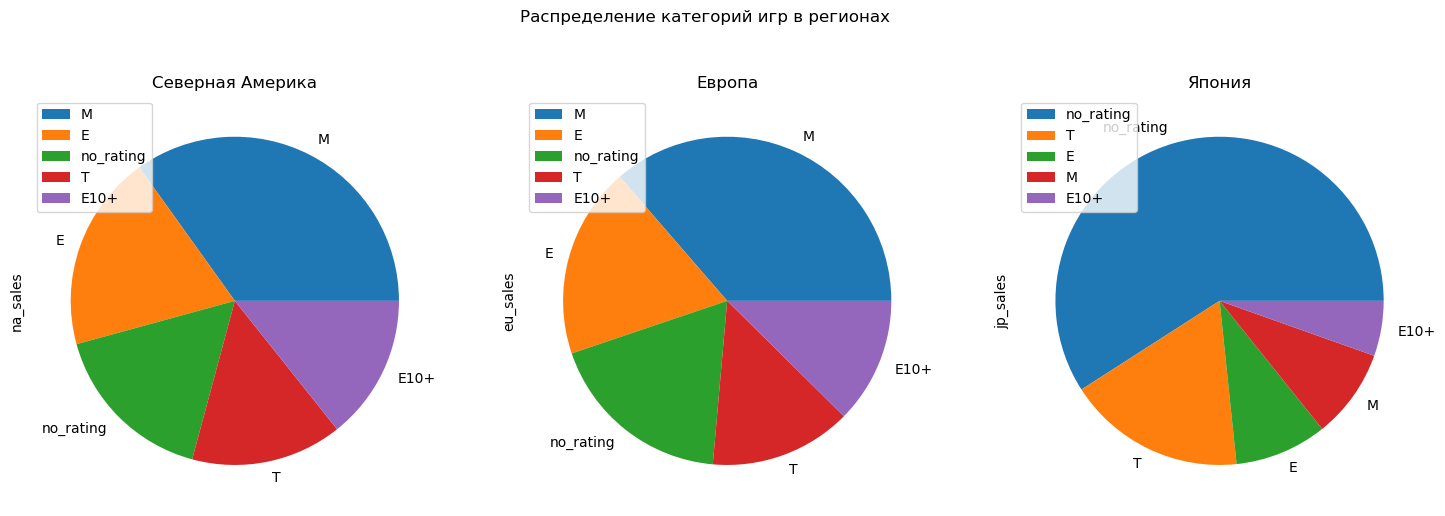

In [60]:
plt.figure(figsize=[18, 6])
plt.suptitle('Распределение категорий игр в регионах')

plt.subplot(1, 3, 1)
(
    less_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
    .plot(x='rating', y='na_sales', kind='pie', title='Северная Америка')
)
plt.legend(loc='upper left')

plt.subplot(1, 3, 2)
(
    less_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
    .plot(x='rating', y='eu_sales', kind='pie', title='Европа')
)
plt.legend(loc='upper left')

plt.subplot(1, 3, 3)
(
    less_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
    .plot(x='rating', y='jp_sales', kind='pie', title='Япония')
)
plt.legend(loc='upper left')

plt.show()

<b> Для Северной Америки ТОП-5 наиболее продаваемых игр с рейтингом: </b>
1. M (17+ лет) - 81.09 млн продаж
2. E (для всех) - 45.01 млн продаж
3. Нет рейтинга - 38.48 млн продаж
4. T (13+ лет) - 34.61 млн продаж
5. E10+ (10+ лет) - 33.23 млн продаж

<b> Для Европы ТОП-5 наиболее продаваемых игр с рейтингом: </b>
1. M (17+ лет) - 76.64 млн продаж
2. E (для всех) - 39.71 млн продаж
3. Нет рейтинга - 38.81 млн продаж
4. T (13+ лет) - 29.50 млн продаж
5. E10+ (10+ лет) - 26.16 млн продаж

<b> Для Японии ТОП-5 наиболее продаваемых игр с рейтингом: </b>
1. Нет рейтинга - 48.52 млн продаж
2. T (13+ лет) - 14.43 млн продаж
3. E (для всех) - 7.47 млн продаж
4. M (17+ лет) - 7.24 млн продаж
5. E10+ (10+ лет) - 4.46 млн продаж

<b> Вывод 4.3: </b> 

Опять сильно различается рынок Японии от рынков Северной Америки и Европы.

Рынки Северной Америки и Европы похожи в распределении рейтингов, но различаются кол-вом продаж (незначительно). Наиболее продаваемые игры - игры категории M (17+). Видимо, эта возрастная категория наиболее часто играет и покупает игры в этих регионах.

На рынке Японии распределение совершенно другое: самые продаваемые игры без рейтинга. Возможно это связано с тем, что в Японии другой регулятор, который имеет большее значение, чем организация ESRB. Далее идут игры для подростков, скорее всего они чаще и играют.

Еще остатется вопрос - насколько серьезно в этих регионах отслеживается возраст покупающего и рейтинг. Потому что, например, взрослый (родитель) может купить ребенку игры категории 17+. И отсюда еще вопрос: насколько этит рейтинг имеет вес в обществе, что к нему прислушываются.

Так как пропуски в столбце с рейтингом заполнила значением no_rating, замечу, что для 2014-2016 гг. нет игр с рейтингом RP. Значит, организация ESRB работает хорошо и определяет рейтинги быстро. :)

<b> Вывод 4. Составим портреты пользователей в разных регионах </b>

Северная Америка: игрок пользуется платформами PS4 или XOne. Чаще всего он покупает игры жанров action, shooter и sports. Скорее всего, это уже взрослый человек от 17 лет.

Европа: игрок пользуется платформой PS4, гораздо реже XOne (почти в 2 раза). Чаще всего он покупает игры жанров action и shooter. Скорее всего, это уже взрослый человек от 17 лет.

Япония: игрок скорее всего пользуется платформой 3DS, гораздо реже PSV или PS4 или PS3. Чаще всего она покупает игры жанров action и role-playing. Скорее всего, это подросток 13+ лет.

## Проверим статистические гипотезы

In [61]:
alpha = 0.05 # критический уровень стат. значимости

### Проверка первой гипотезы

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны.

H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [62]:
xone_data = less_data[less_data['platform'] == 'XOne'].dropna(subset=['user_score'])
pc_data = less_data[less_data['platform'] == 'PC'].dropna(subset=['user_score'])

# если p-value окажется меньше alpha, то отвергнем гипотезу

results = st.ttest_ind(xone_data['user_score'], pc_data['user_score'])
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.10661123611987149
Не получилось отвергнуть нулевую гипотезу


<b> Вывод 5.1:</b> не получилось отвергнуть нулевую гипотезу. 

Значит, Средние пользовательские рейтинги платформ Xbox One и PC равны для данных 2014-2016 гг.

### Проверка второй гипотезы

H0: Средние пользовательские рейтинги жанров Action и Sports разные.

H1: Средние пользовательские рейтинги жанров Action и Sports равны.

In [63]:
action_data = less_data[less_data['genre'] == 'action'].dropna(subset=['user_score'])
sports_data = less_data[less_data['genre'] == 'sports'].dropna(subset=['user_score'])

# если p-value окажется меньше alpha, то отвергнем гипотезу

results = st.ttest_ind(action_data['user_score'], sports_data['user_score'])
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.5336364603493818e-18
Отвергаем нулевую гипотезу


<b> Вывод 5.2:</b> отвергаем нулевую гипотезу. 

Значит, Средние пользовательские рейтинги жанров Action и Sports равны для данных 2014-2016 гг.

## Общий вывод

Провела исследование исторических данных по продаже игр. 

Для исследования использовался период с 2014 по 2016 гг., т.к. это целесообразно планированию на 2017 г. Вот какие выводы можно сделать (подробнее они описаны выше, по ходу исследования):

1. Могу выделить платформы, на которых следует сфокусироваться в 2017г. - это PS4 и XOne.
2. Оказалось, что на продажи слабо влияют оценки пользователей и критиков.
3. Самый популярный жанр игр, в который стоит вкладываться - это Action.
4. Составила портреты пользователей для рынков Северной Америки, Европы и Японии. Регионы различаются между собой, поэтому важно это учеть при планировании. Достаточно сильно похожи Северная Америка и Европа, для этих регионов можно придерживаться одной политики. А вот рынок Японии достаточно специфичен (относительно Америки и Европы), поэтому скорее всего для него потребуется другая рекламная кампания.
5. Напоследок были проверены статистические гипотезы.


<b> Портреты пользователей в разных регионах: </b>

<b> Северная Америка: </b> игрок пользуется платформами PS4 или XOne. Чаще всего он покупает игры жанров action, shooter и sports. Скорее всего, это уже взрослый человек от 17 лет.

<b> Европа: </b> игрок пользуется платформой PS4, гораздо реже XOne (почти в 2 раза). Чаще всего он покупает игры жанров action и shooter. Скорее всего, это уже взрослый человек от 17 лет.

<b> Япония: </b> игрок скорее всего пользуется платформой 3DS, гораздо реже PSV или PS4 или PS3. Чаще всего она покупает игры жанров action и role-playing. Скорее всего, это подросток 13+ лет.